<a href="https://colab.research.google.com/github/rajy4683/S10EVA4/blob/master/S10EVA4_GCAM_LRF_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Mounted at /content/drive


In [2]:
!nvidia-smi

Tue Mar 31 16:09:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  


### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [3]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112kB 11.3MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.4MB 20.4MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 102kB 16.0MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112kB 28.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 102kB 15.2MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 460kB 66.2MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 634kB 59.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 12.3MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-8b6ij8jh
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-8b6ij8jh
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=65965a3f941b85e601d60e491b6104827645a82cff4f90ed6980c5cd89425251
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hzsirbx/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#### WANDB client login

In [5]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

train_s8_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```


### Albumentations used:
##### 1. Cutout
##### 2. MotionBlur
##### 3. RandomBrightnessContrast

In [0]:
%load_ext autoreload

  pip install torch-lr-finder -v --global-option="amp"


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([128, 3, 32, 32]) tensor([-0.0151, -0.0195, -0.0003]) tensor([0.9201, 0.9175, 0.8830])



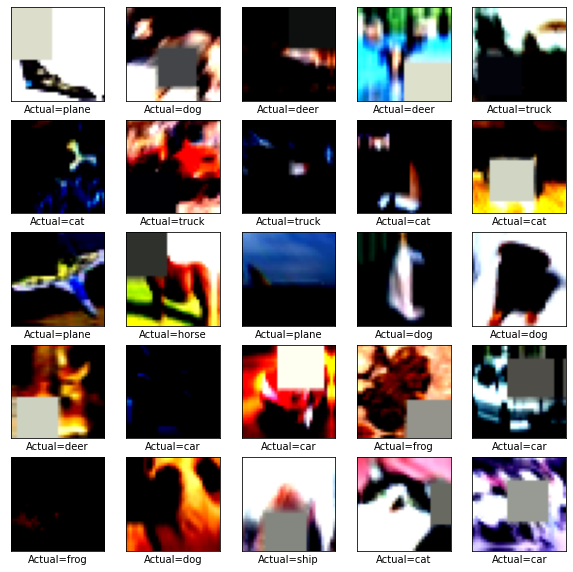

In [8]:
%autoreload 2
from RekogNizer import lrfinder
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim


from RekogNizer import hyperparams
hyper_param_values = {
                      "lr":0.21694816106338752,
                      "dropout":0.1, 
                      "momentum":0.7062620648684866, 
                      "epochs":100, 
                      "weight_decay":0.00015753761358641488
                      }
hyperparams.set_hyperparam(hyper_param_values)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

torch.manual_seed(1)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fileutils.show_sample_images(images,labels, dataloader.classes)

ERROR! Session/line number was not unique in database. History logging moved to new session 60


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
Min loss:2.07717762058865 Min LR:3.3416378206933306 Max LR:26.16710049083422
LR plotting in progress


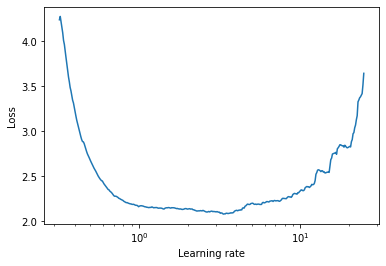

(2.07717762058865, 3.3416378206933306, 26.16710049083422)

In [0]:
%autoreload 1
from RekogNizer import dataloader
from RekogNizer import traintest
model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])
torch.manual_seed(1)
criterion = nn.CrossEntropyLoss()
##3.279445101495624
#0.30585674609910773
optimizer = optim.SGD(model_new.parameters(), lr=0.279445101495624, weight_decay=0.00020996378493752516,momentum=0.42786879879874073)#-->89.43


#optimizer = optim.SGD(model_new.parameters(), lr=0.279445101495624, weight_decay=0.0002477257780146537,momentum=0.8842149042806691)

traintest.find_lr_type1(model_new, optimizer, criterion, trainloader, seed=1)


In [0]:
optimizer = optim.SGD(model_new.parameters(), lr=0.0279445101495624, weight_decay=0.00020996378493752516,momentum=0.42786879879874073)#-->89.43

traintest.find_lr_type2(model_new, optimizer, criterion, trainloader, testloader, seed=1)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
Min loss:2.303268256664276 Min LR:0.035719683826315234 Max LR:0.13228182132922237
LR plotting in progress


In [0]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":3.3416378206933306, "momentum":0.42786879879874073, "epochs":50, "weight_decay":0.00020996378493752516}'

Setting  lr  =  3.3416378206933306
Setting  momentum  =  0.42786879879874073
Setting  epochs  =  50
Setting  weight_decay  =  0.00020996378493752516
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 3.3416378206933306 
            momentum : 0.42786879879874073 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.00020996378493752516 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
Files already downloaded and verified
Files already downloaded and verified
Initializing datasets and dataloaders
wandb: Tracking run with wandb version 0.8.31
wandb: Run data is saved locally in wandb/run-20200330_193828-if1tjc6i
wandb: Syncing run absurd-bush-929
wandb: ‚≠êÔ∏è View project at https://app.wandb.ai/rajy4683/news5


#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

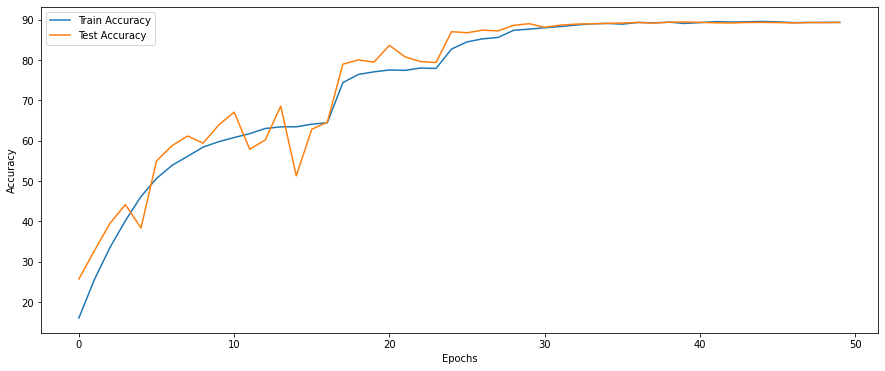

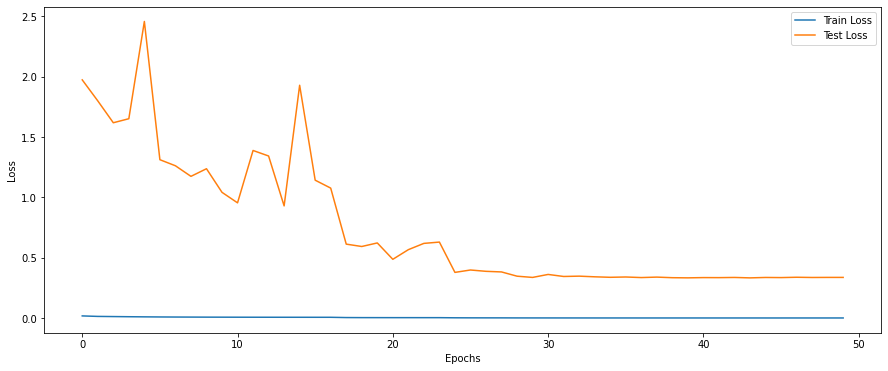

In [10]:
run_list = ['rajy4683/news5/runs/if1tjc6i']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [21]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-23b3505819.h5")
my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-15d1661149.h5", local_device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from RekogNizer import hyperparams
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 85 %
Accuracy of   car : 96 %
Accuracy of  bird : 82 %
Accuracy of   cat : 75 %
Accuracy of  deer : 88 %
Accuracy of   dog : 80 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 91 %
Accuracy of truck : 92 %


<BarContainer object of 10 artists>

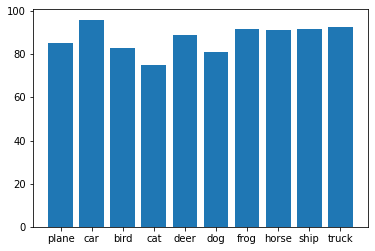

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

## Misclassified images (Unable to spot the cats correctly :( )

Files already downloaded and verified
Files already downloaded and verified
1211
(1211,)
87.89 -9.254130699157715


<Figure size 720x720 with 0 Axes>

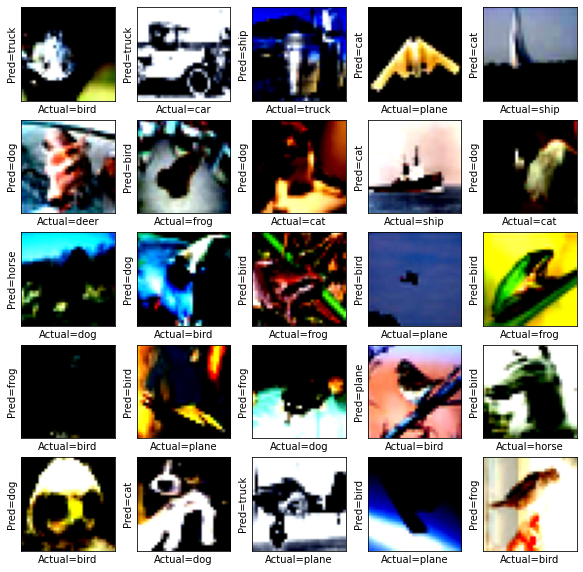

In [25]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

traintest.show_misclassfied_images(my_model, testloader, classes)


# GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

saliency_map size : torch.Size([8, 8])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


/content/drive/My Drive/EVA4/RekogNizer/gradcam2.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


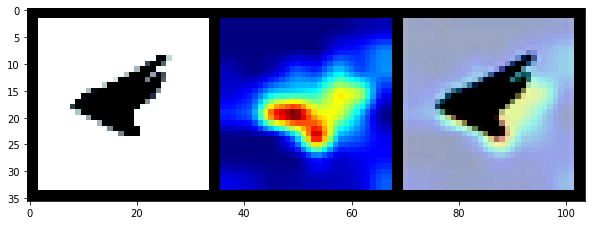

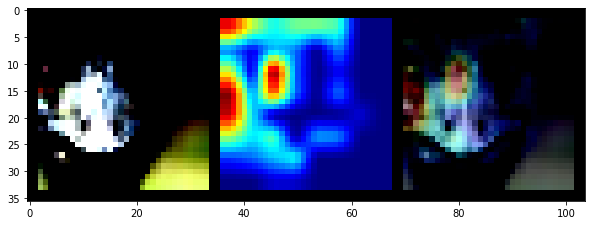

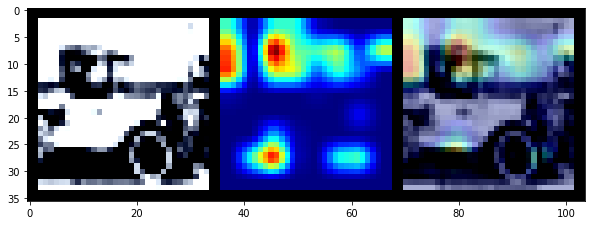

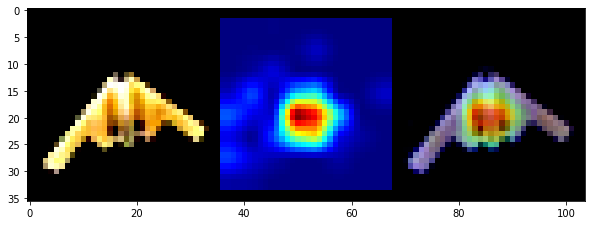

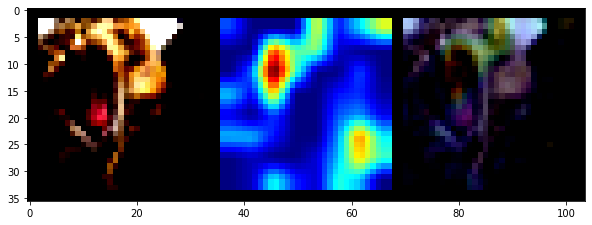

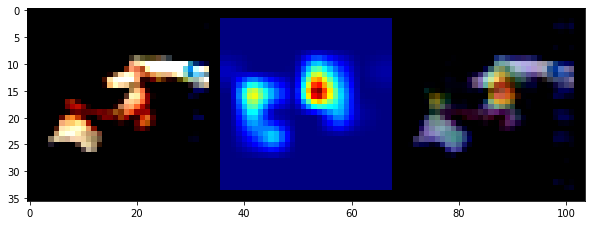

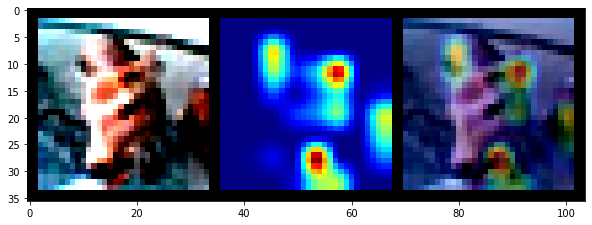

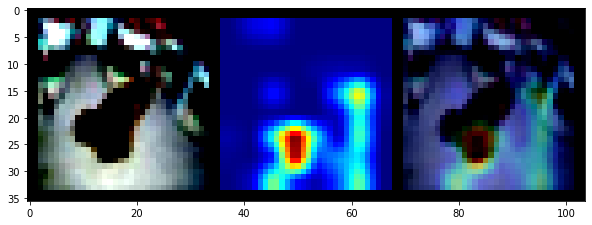

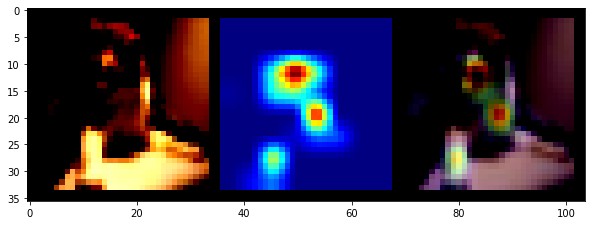

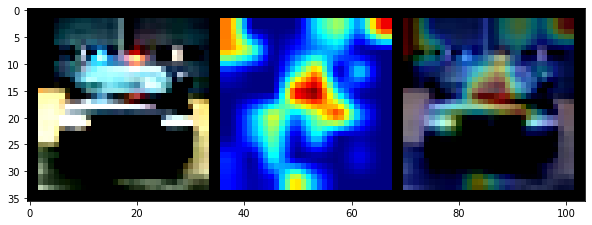

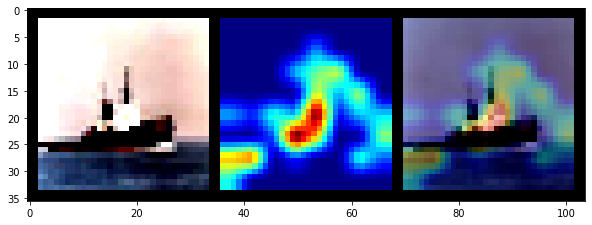

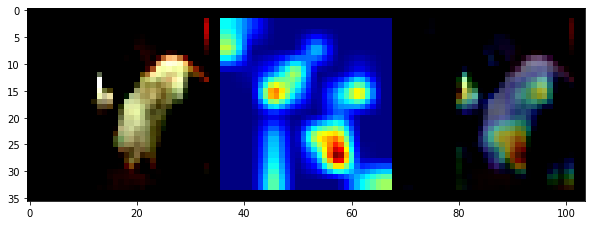

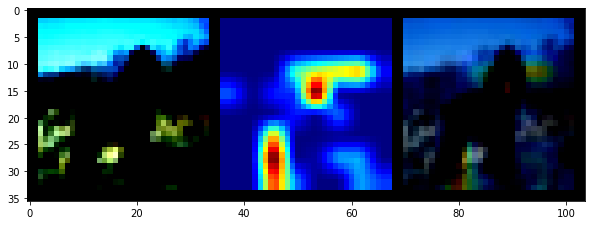

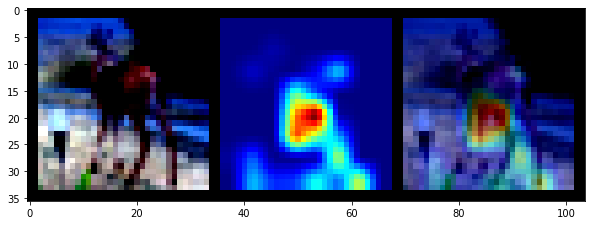

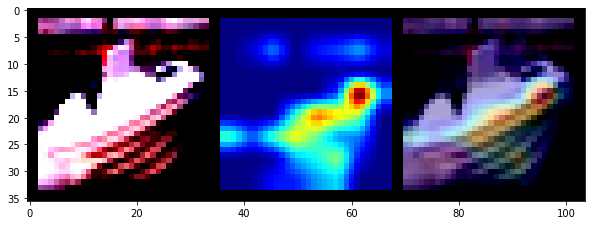

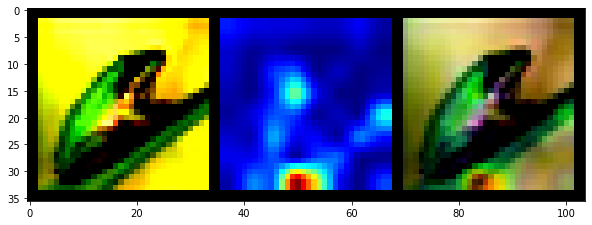

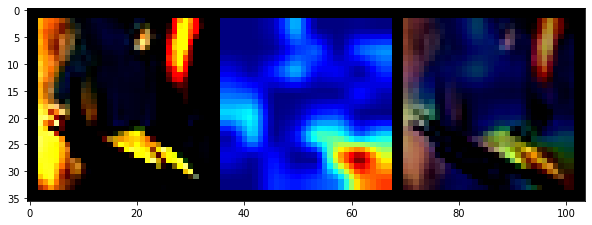

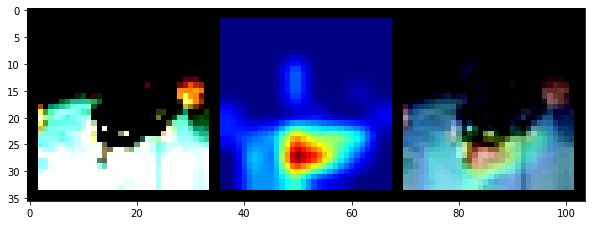

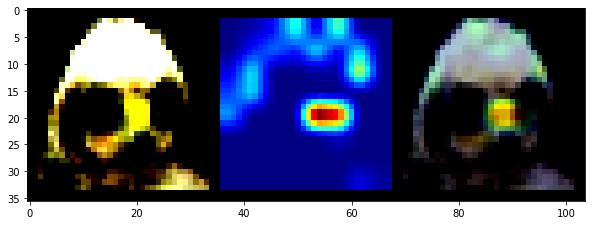

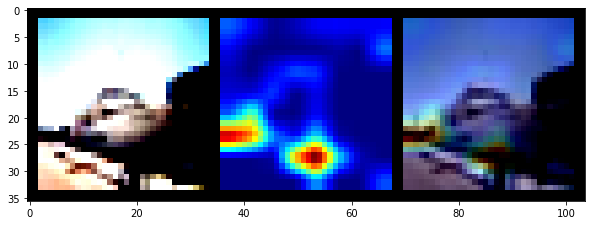

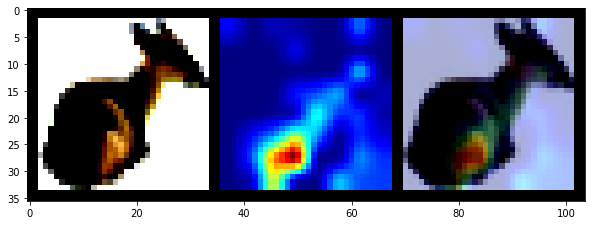

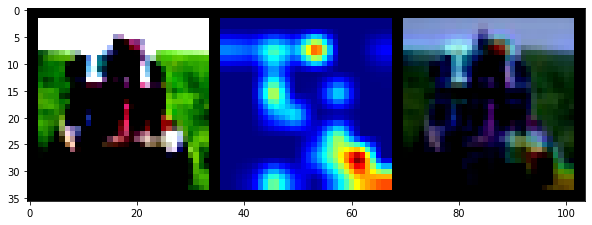

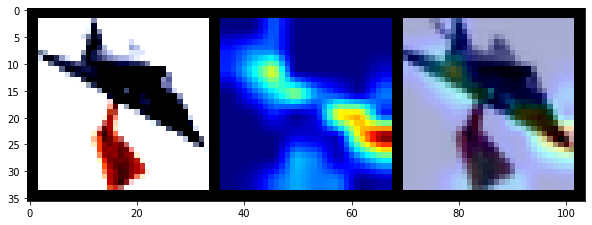

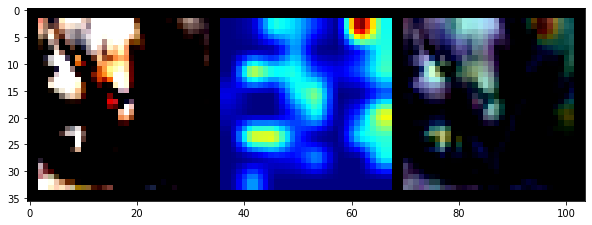

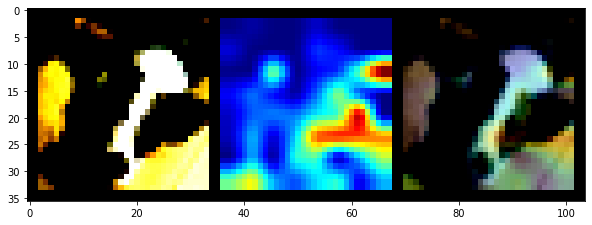

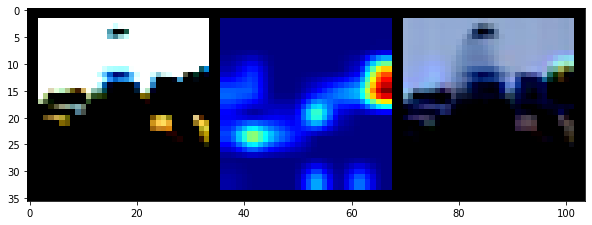

In [27]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer3', input_size=(32, 32))
for image in error_images[:26]:
    visualize_gradcam_image(resnet_model_dict,image, mean=[0.4827, 0.4724, 0.4427], std=[0.2482, 0.2501, 0.2698])

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/content/drive/My Drive/EVA4/RekogNizer/gradcam2.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


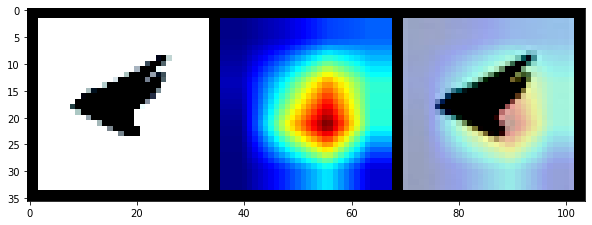

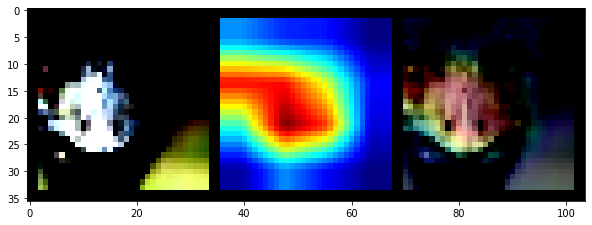

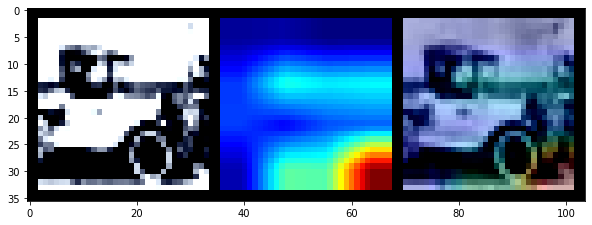

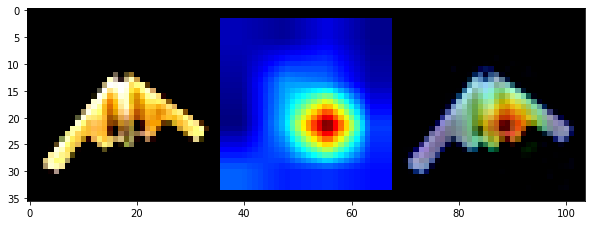

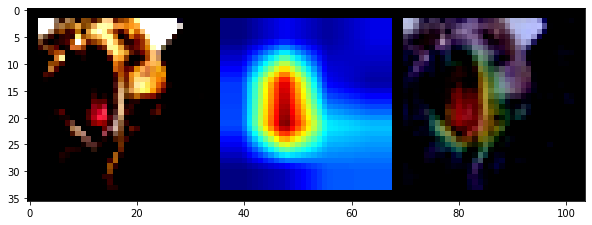

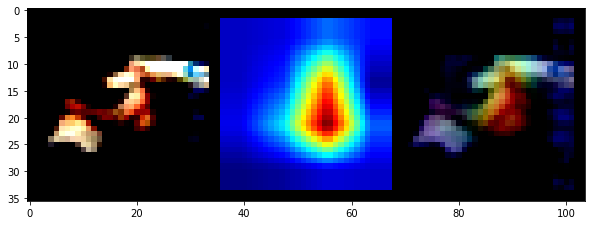

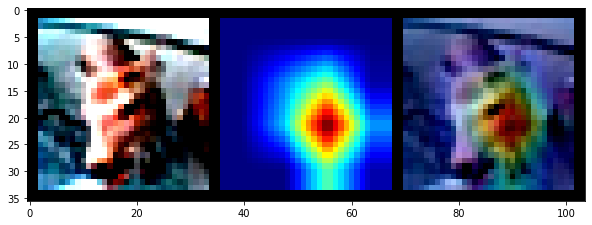

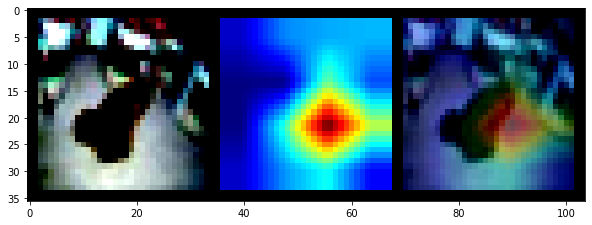

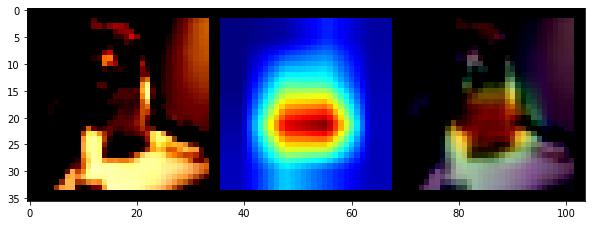

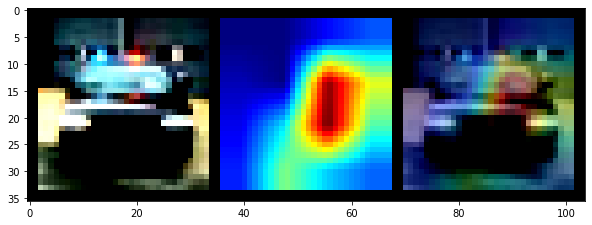

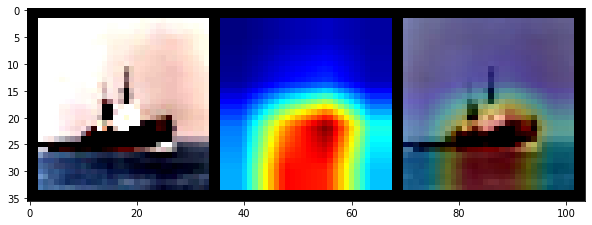

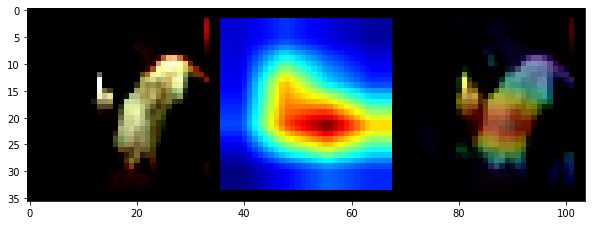

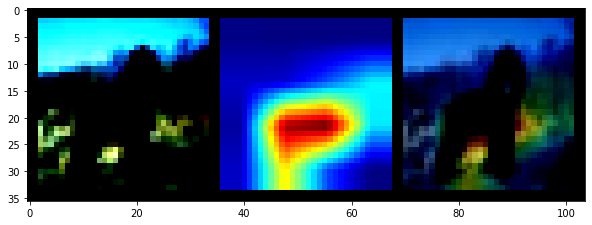

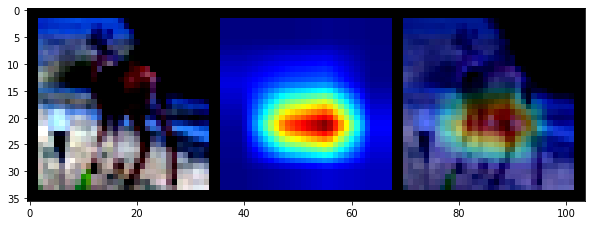

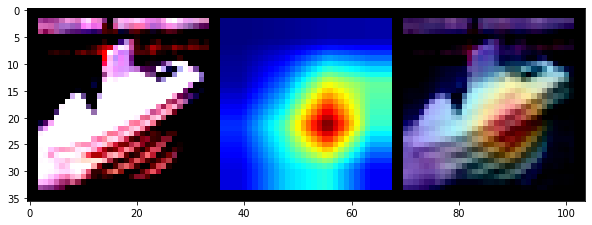

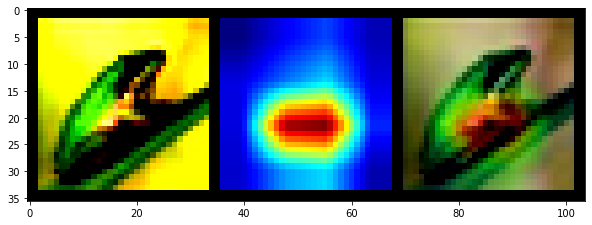

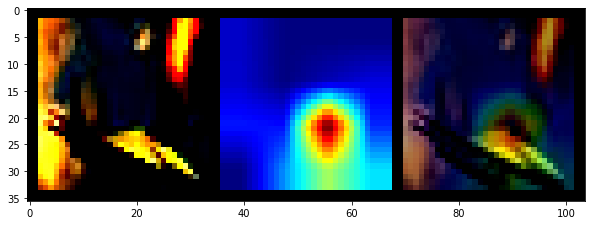

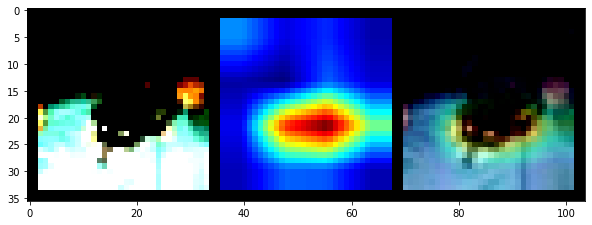

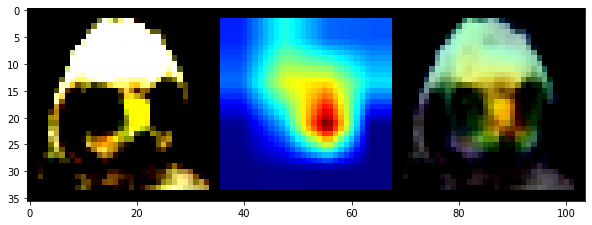

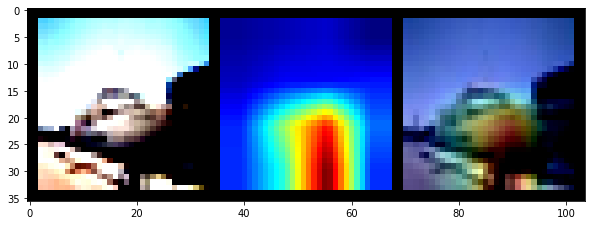

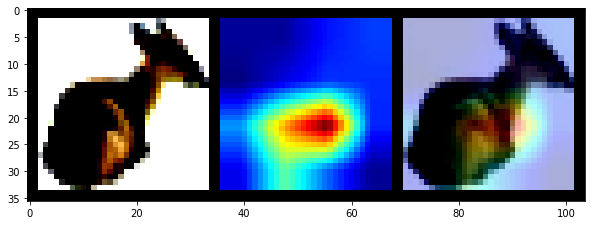

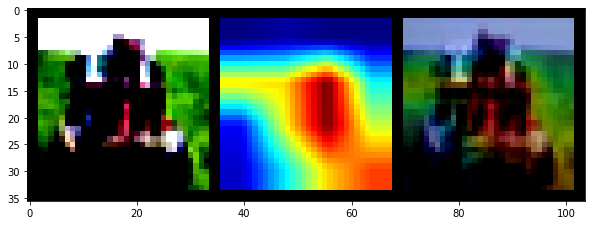

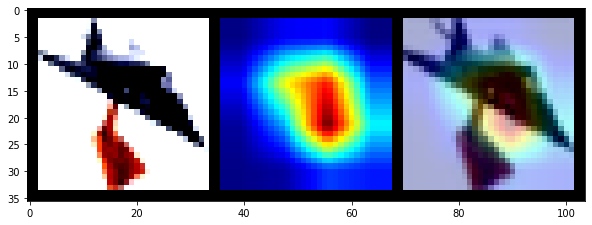

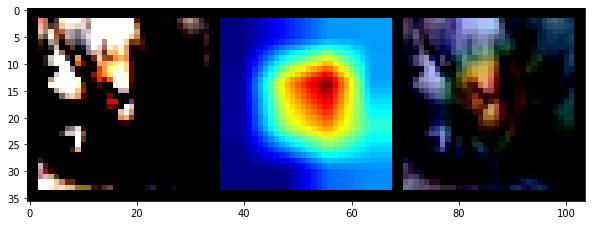

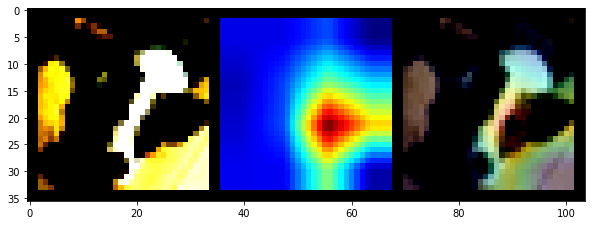

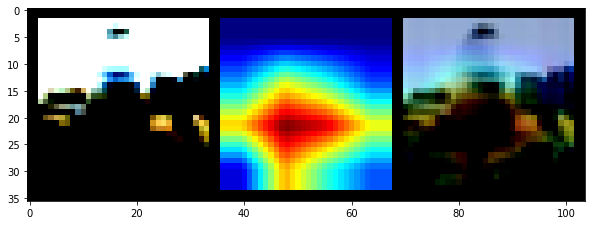

In [28]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer4', input_size=(32, 32))
for image in error_images[:26]:
    visualize_gradcam_image(resnet_model_dict,image, mean=[0.4827, 0.4724, 0.4427], std=[0.2482, 0.2501, 0.2698])